In [11]:
import pandas as pd
data = pd.read_csv("wine.data",encoding = 'ISO-8859-1', index_col=False)
data.head()

,Class,Alcool,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


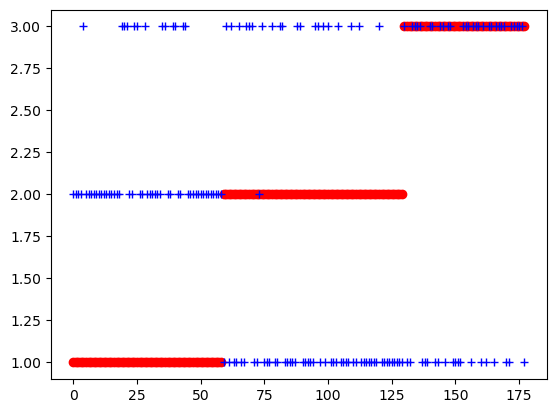

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

plt.subplots()
classes = data.loc[:,data.columns[0]].to_numpy()
plt.plot(classes, 'ro')
model = KMeans(n_clusters=3, init='k-means++', n_init=1000, algorithm='elkan').fit(data)
tab = np.array(model.labels_)
tab = tab +1
plt.plot(tab, 'b+')
plt.show()


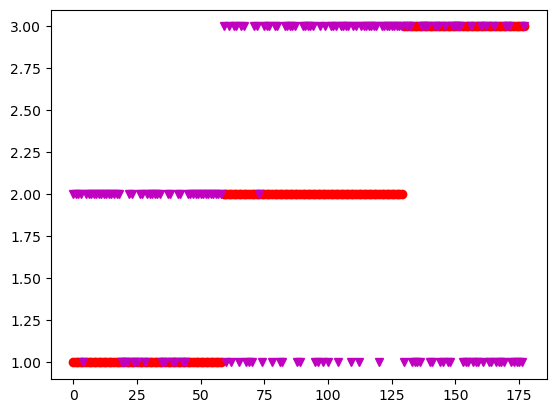

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

plt.subplots()
classes = data.loc[:,data.columns[0]].to_numpy()
plt.plot(classes, 'ro')
model = KMeans(n_clusters=3, init='k-means++', n_init=1000).fit(data)
tab = np.array(model.labels_)
tab = tab +1
plt.plot(tab, 'mv')
plt.show()